In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import PIL.Image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import os
 

Using TensorFlow backend.


#  Model deployment

In [2]:
#Defining paths
TRAIN_PATH = 'D:\coviddataset\Train'
VAL_PATH = 'D:\coviddataset\Val'

In [3]:
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [4]:
#Getting parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

# Training data 

In [5]:
import keras
from keras.models import Sequential
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:\coviddataset\Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:\coviddataset\Val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 100)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/1
1000/1000 [==============================] - 1216s 1s/step - loss: 0.0356 - accuracy: 0.9856 - val_loss: 0.0115 - val_accuracy: 0.9833


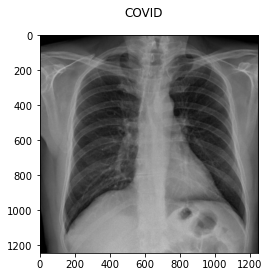

In [10]:
img_src = 'Desktop\lix1.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('Desktop\lix1.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

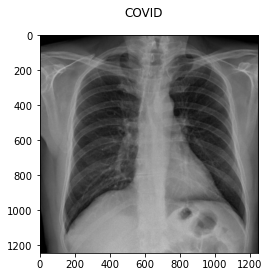

In [8]:
img_src = 'Desktop\lix1.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('Desktop\lix1.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"
target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

In [1]:

img_src = 'Desktop\sato.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('Desktop\sato.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"
target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

NameError: name 'cv2' is not defined

## Confusion Matrix

In [20]:
import os
train_generator.class_indices

NameError: name 'train_generator' is not defined

In [11]:
y_actual, y_test = [],[]

In [9]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)
    

NameError: name 'os' is not defined

In [10]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

NameError: name 'os' is not defined

In [78]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

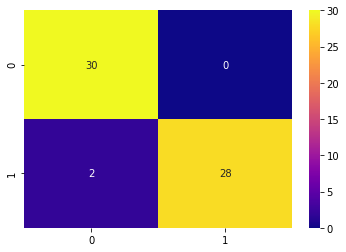

In [80]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal